In [1]:
!pip install -q --upgrade git+https://github.com/mlss-skoltech/tutorials.git#subdirectory=bayesian_deep_learning

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
import tqdm
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from mlss2019bdl import dataset_from_numpy

X_train = np.linspace(-6.0, +6.0, num=20)[:, np.newaxis]
y_train = np.sin(X_train * np.pi / 2) + 0.25 * X_train**2

In [4]:
X_train.shape

(20, 1)

# First Network

In [5]:
model=tf.keras.models.Sequential([
                                tf.keras.layers.Dense(512,activation="linear",input_shape=[1],use_bias=True),
                                tf.keras.layers.LeakyReLU(),
                                tf.keras.layers.Dense(512,activation="linear",use_bias=True),
                                tf.keras.layers.LeakyReLU(),
                                tf.keras.layers.Dense(1,activation="linear",use_bias=True),
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1024      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 264,193
Trainable params: 264,193
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=1e-3,decay=1e-3),loss="mse")

In [8]:
model.fit(X_train,y_train,epochs=1000,verbose=1)

Epoch 1/1000
1/1 [==============================] - 0s 2ms/step - loss: 21.4725
Epoch 2/1000
1/1 [==============================] - 0s 1ms/step - loss: 20.5131
Epoch 3/1000
1/1 [==============================] - 0s 5ms/step - loss: 19.6145
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 18.7669
Epoch 5/1000
1/1 [==============================] - 0s 1ms/step - loss: 17.9574
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 17.1900
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 16.4606
Epoch 8/1000
1/1 [==============================] - 0s 1ms/step - loss: 15.7705
Epoch 9/1000
1/1 [==============================] - 0s 1ms/step - loss: 15.1146
Epoch 10/1000
1/1 [==============================] - 0s 1ms/step - loss: 14.4886
Epoch 11/1000
1/1 [==============================] - 0s 1ms/step - loss: 13.8880
Epoch 12/1000
1/1 [==============================] - 0s 1ms/step - loss: 13.3108
Epoch 13/1000
1/1 [==================

In [9]:
X_domain = np.linspace(-10., +10., num=251)[:, np.newaxis]


In [10]:
y_pred=model.predict(X_domain)
y_pred

array([[ 1.27423897e+01],
       [ 1.26326199e+01],
       [ 1.25228481e+01],
       [ 1.24130821e+01],
       [ 1.23033104e+01],
       [ 1.21935415e+01],
       [ 1.20837688e+01],
       [ 1.19739971e+01],
       [ 1.18642263e+01],
       [ 1.17544565e+01],
       [ 1.16446772e+01],
       [ 1.15348988e+01],
       [ 1.14251184e+01],
       [ 1.13153419e+01],
       [ 1.12055626e+01],
       [ 1.10957823e+01],
       [ 1.09860048e+01],
       [ 1.08762245e+01],
       [ 1.07664471e+01],
       [ 1.06566629e+01],
       [ 1.05468855e+01],
       [ 1.04371061e+01],
       [ 1.03273268e+01],
       [ 1.02175465e+01],
       [ 1.01077681e+01],
       [ 9.99798775e+00],
       [ 9.88820744e+00],
       [ 9.77842808e+00],
       [ 9.66864300e+00],
       [ 9.55885792e+00],
       [ 9.44906998e+00],
       [ 9.33928299e+00],
       [ 9.22949696e+00],
       [ 9.11970997e+00],
       [ 9.00990868e+00],
       [ 8.90010548e+00],
       [ 8.79030418e+00],
       [ 8.68050194e+00],
       [ 8.5

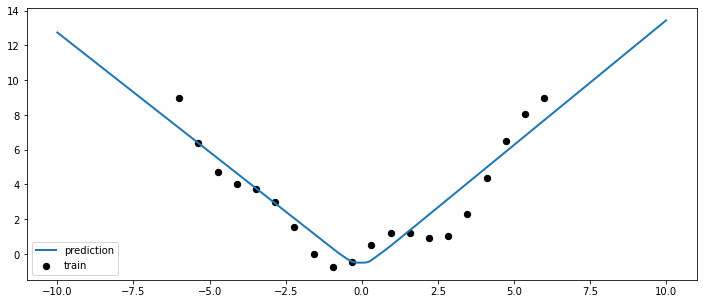

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

ax.scatter(X_train, y_train, c="black", s=40, label="train")

ax.plot(X_domain, y_pred, c="C0", lw=2, label="prediction")

plt.legend();

# Create linearDropout

In [45]:
def freeze(model):
  for layer in model.layers:
    layer.trainable=False
def unfreeze(model):
  for layer in model.layers:
    layer.trainable=True

In [95]:
class LinearDropout(tf.keras.layers.Layer):
    def __init__(self,p=0.5, units=32, input_dim=1,trainable=False):
        super(LinearDropout, self).__init__()
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(
            initial_value=w_init(shape=(input_dim, units), dtype="float32"),
            trainable=trainable,
        )
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(
            initial_value=b_init(shape=(units,), dtype="float32"), trainable=trainable
        )
        self.p=p

    def call(self, inputs):
        drop=tf.nn.dropout(inputs,self.p)
        return tf.matmul(drop, self.w) + self.b

In [115]:
class Linear(tf.keras.layers.Layer):
    def __init__(self, units=32, input_dim=32):
        super(Linear, self).__init__()
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(
            initial_value=w_init(shape=(input_dim, units), dtype="float32"),
            trainable=True,
        )
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(
            initial_value=b_init(shape=(units,), dtype="float32"), trainable=True
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [144]:
model=tf.keras.models.Sequential([
                                tf.keras.layers.Dense(512,activation="linear",input_shape=[1],use_bias=True),
                                tf.keras.layers.LeakyReLU(),
                                LinearDropout(p=0.5,units=512,input_dim=512,trainable=True),
                                tf.keras.layers.LeakyReLU(),
                                LinearDropout(p=0.5,units=1,input_dim=512,trainable=True),
])

In [145]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               1024      
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
linear_dropout_24 (LinearDro (None, 512)               262656    
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
linear_dropout_25 (LinearDro (None, 1)                 513       
Total params: 264,193
Trainable params: 264,193
Non-trainable params: 0
_________________________________________________________________


In [146]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=1e-3,decay=1e-3),loss="mse")

In [147]:
model.fit(X_train,y_train,epochs=1000,verbose=0)

In [148]:
def point_estimate(model, X_domain, n_samples=1, verbose=False):
    """Draw pointwise samples with stochastic forward pass."""

    outputs = []
    for sample in tqdm.tqdm(range(n_samples), disable=not verbose):

        outputs.append(model.predict(X_domain))

    return tf.stack(outputs,axis=0)
    pass

In [149]:
def sample_function(model, dataset, n_samples=1, verbose=False):
    """Draw a realization of a random function."""

    ## Exercise: code a function similar to `point_estimate()`,
    ##  that collects the predictions from `frozen` models. Don't
    ##  forget to unfreeze before returning.

    outputs = []
    for _ in tqdm.tqdm(range(n_samples), disable=not verbose):
        freeze(model)

        outputs.append(model.predict(dataset))

    unfreeze(model)

    return tf.stack(outputs,axis=0)
    pass

In [150]:
samples=point_estimate(model,X_domain,n_samples=101)


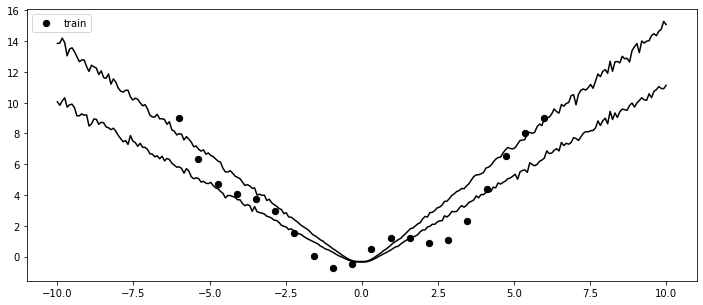

In [156]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.scatter(X_train, y_train, c="black", s=40, label="train")

mean, std = tf.keras.backend.mean(samples,axis=0),tf.keras.backend.std(samples,axis=0)
ax.plot(X_domain, mean + 1 * std, c="k")
ax.plot(X_domain, mean - 1 * std, c="k");
plt.legend()

100%|██████████| 101/101 [00:04<00:00, 21.17it/s]


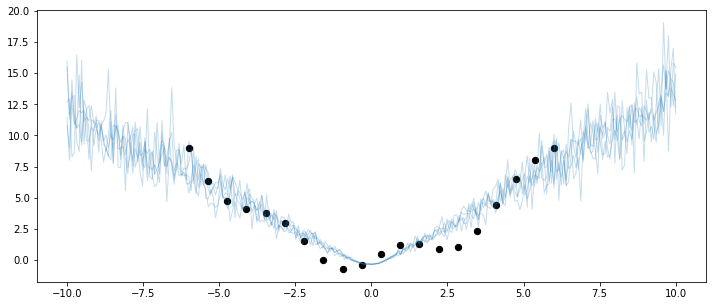

In [157]:
samples = point_estimate(model, X_domain, n_samples=101, verbose=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 5))

ax.scatter(X_train, y_train, c="black", s=40, label="train")
ax.plot(X_domain[:, 0], samples[:5, :, 0].numpy().T, c="C0", lw=1, alpha=0.25);

In [153]:
samples_pe = point_estimate(model, X_domain, n_samples=51, verbose=True)
samples_sf = sample_function(model, X_domain, n_samples=51, verbose=True)

100%|██████████| 51/51 [00:02<00:00, 21.27it/s]


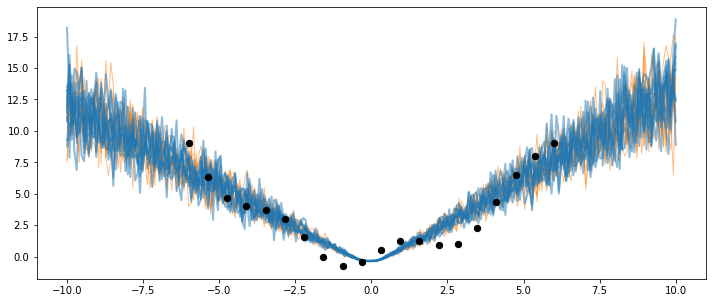

In [154]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

ax.plot(X_domain[:, 0], samples_pe[:10, :, 0].numpy().T,
        c="C1", lw=1, alpha=0.5)

ax.plot(X_domain[:, 0], samples_sf[:10, :, 0].numpy().T,
        c="C0", lw=2, alpha=0.5)
ax.scatter(X_train, y_train, c="black", s=40,
           label="train", zorder=+10);

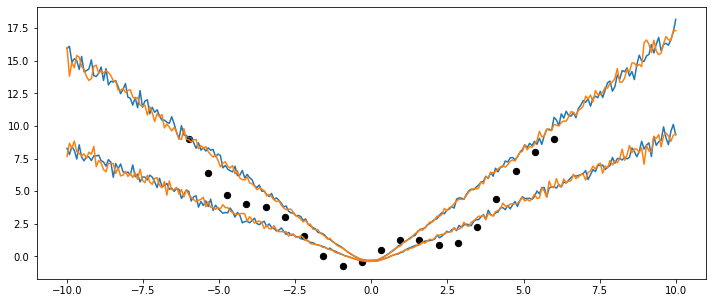

In [155]:
ig, ax = plt.subplots(1, 1, figsize=(12, 5))

ax.scatter(X_train, y_train, c="black", s=40, label="train")

mean, std = mean, std = tf.keras.backend.mean(samples_sf,axis=0),tf.keras.backend.std(samples_sf,axis=0)
ax.plot(X_domain, mean + 1.96 * std, c="C0")
ax.plot(X_domain, mean - 1.96 * std, c="C0");

mean, std = mean, std = tf.keras.backend.mean(samples_pe,axis=0),tf.keras.backend.std(samples_pe,axis=0)
ax.plot(X_domain, mean + 1.96 * std, c="C1")
ax.plot(X_domain, mean - 1.96 * std, c="C1");